In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def generate_graph(num_nodes, density):
    """Generates a connected graph based on the number of nodes and density."""
    graph = nx.dense_gnm_random_graph(num_nodes, int(density * num_nodes * (num_nodes - 1) / 2))
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = random.randint(1, 10)
    if not nx.is_connected(graph):
        return generate_graph(num_nodes, density)
    return graph

def generate_negative_weight_graph(num_nodes, density):
    """Generates a connected graph based on the number of nodes and density."""
    graph = nx.dense_gnm_random_graph(num_nodes, int(density * num_nodes * (num_nodes - 1) / 2))
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = random.randint(-10, 10)
    if not nx.is_connected(graph):
        return generate_graph(num_nodes, density)
    return graph

def kruskal_mst(graph):
    """Finds the minimum spanning tree of a graph using Kruskal's algorithm."""
    mst = nx.Graph()
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    # Initialize parent and rank for Union-Find
    parent = {node: node for node in graph.nodes()}
    rank = {node: 0 for node in graph.nodes()}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            elif rank[root1] < rank[root2]:
                parent[root1] = root2
            else:
                parent[root2] = root1
                rank[root1] += 1

    for u, v, weight in edges:
        if find(u) != find(v):
            mst.add_edge(u, v, weight=weight['weight'])
            union(u, v)
            if len(mst.nodes) == graph.number_of_nodes():
                break

    total_weight = sum(data['weight'] for u, v, data in mst.edges(data=True))
    return mst, total_weight

Test the Kruskals algorithm with sparse graphs

Edges in the MST with weights:
(5, 9, {'weight': 1})
(9, 12, {'weight': 4})
(6, 11, {'weight': 1})
(11, 1, {'weight': 4})
(1, 13, {'weight': 2})
(1, 2, {'weight': 5})
(13, 4, {'weight': 3})
(4, 8, {'weight': 3})
(4, 10, {'weight': 4})
(8, 12, {'weight': 3})
(8, 0, {'weight': 4})
(7, 14, {'weight': 3})
(2, 3, {'weight': 6})
Total weight of the MST: 43


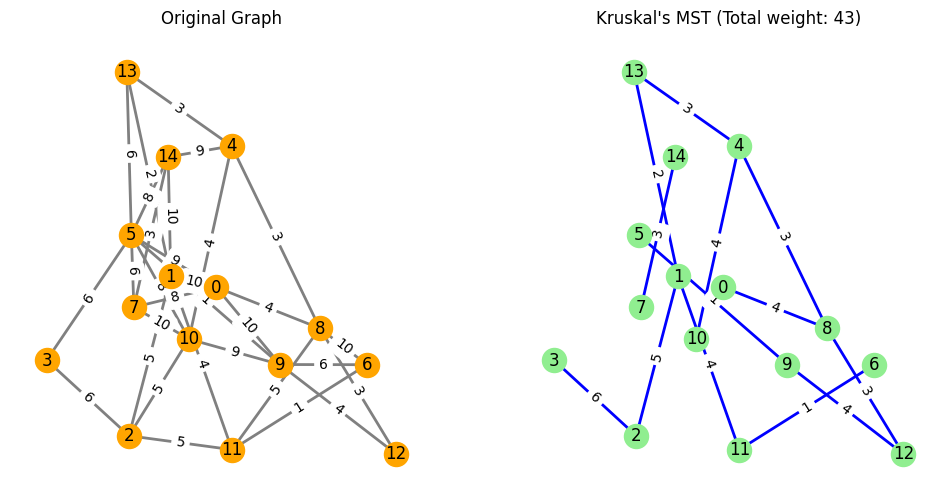

In [ ]:
# Generate graph and find MST using Kruskal's algorithm
num_nodes = 15
density = 0.3  # Adjust for sparser or denser graphs
graph = generate_graph(num_nodes, density)
mst, total_weight = kruskal_mst(graph)

# Print the MST and the total weight
print("Edges in the MST with weights:")
for edge in mst.edges(data=True):
    print(edge)
print(f"Total weight of the MST: {total_weight}")

# Visualize the graph and its MST
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Original Graph")

plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title(f"Kruskal's MST (Total weight: {total_weight})")
plt.show()

Test the Kruskals algorithm with dense graphs

Edges in the MST with weights:
(0, 4, {'weight': 1})
(0, 9, {'weight': 1})
(0, 10, {'weight': 1})
(0, 1, {'weight': 2})
(0, 13, {'weight': 2})
(4, 8, {'weight': 2})
(9, 7, {'weight': 1})
(10, 2, {'weight': 2})
(3, 11, {'weight': 1})
(3, 2, {'weight': 2})
(3, 6, {'weight': 2})
(11, 5, {'weight': 2})
(6, 14, {'weight': 1})
(12, 13, {'weight': 1})
Total weight of the MST: 21


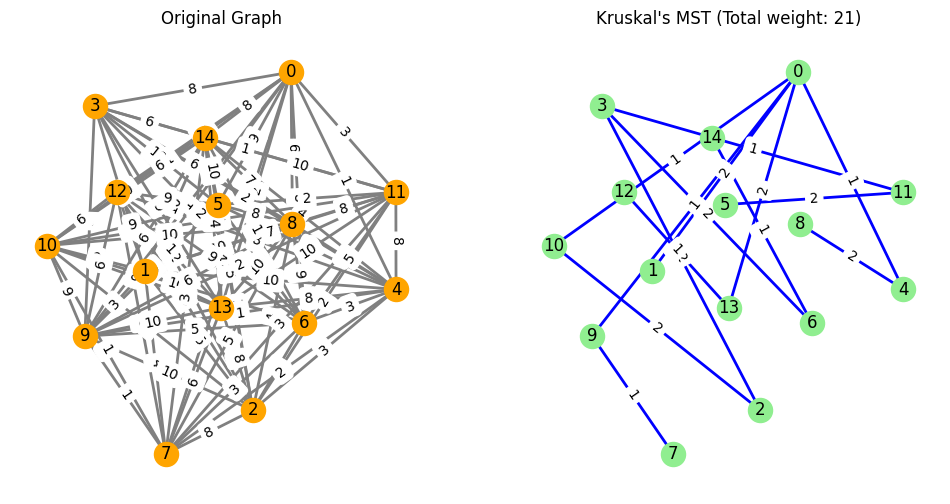

In [ ]:
# Generate graph and find MST using Kruskal's algorithm
num_nodes = 15
density = 0.9  # Adjust for sparser or denser graphs
graph = generate_graph(num_nodes, density)
mst, total_weight = kruskal_mst(graph)

# Print the MST and the total weight
print("Edges in the MST with weights:")
for edge in mst.edges(data=True):
    print(edge)
print(f"Total weight of the MST: {total_weight}")

# Visualize the graph and its MST
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Original Graph")

plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title(f"Kruskal's MST (Total weight: {total_weight})")
plt.show()

Test the Kruskals algorithm with negative weight graphs

Edges in the MST with weights:
(0, 5, {'weight': -10})
(0, 3, {'weight': -8})
(0, 9, {'weight': -8})
(5, 2, {'weight': -10})
(5, 11, {'weight': -9})
(5, 6, {'weight': -7})
(1, 10, {'weight': -10})
(10, 12, {'weight': -7})
(3, 13, {'weight': -10})
(13, 8, {'weight': -9})
(13, 14, {'weight': -6})
(12, 7, {'weight': -6})
(4, 7, {'weight': -6})
Total weight of the MST: -106


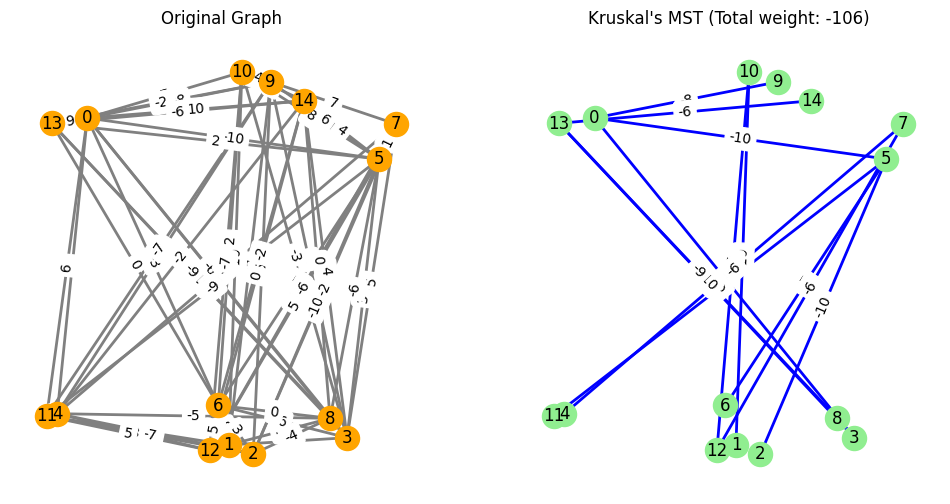

In [ ]:
# Generate graph and find MST using Kruskal's algorithm
num_nodes = 15
density = 0.6  # Adjust for sparser or denser graphs
graph = generate_negative_weight_graph(num_nodes, density)
mst, total_weight = kruskal_mst(graph)

# Print the MST and the total weight
print("Edges in the MST with weights:")
for edge in mst.edges(data=True):
    print(edge)
print(f"Total weight of the MST: {total_weight}")

# Visualize the graph and its MST
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Original Graph")

plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title(f"Kruskal's MST (Total weight: {total_weight})")
plt.show()